In [ ]:
#diddiercofre
#https://github.com/diddiercofre/PDM_Notebooks

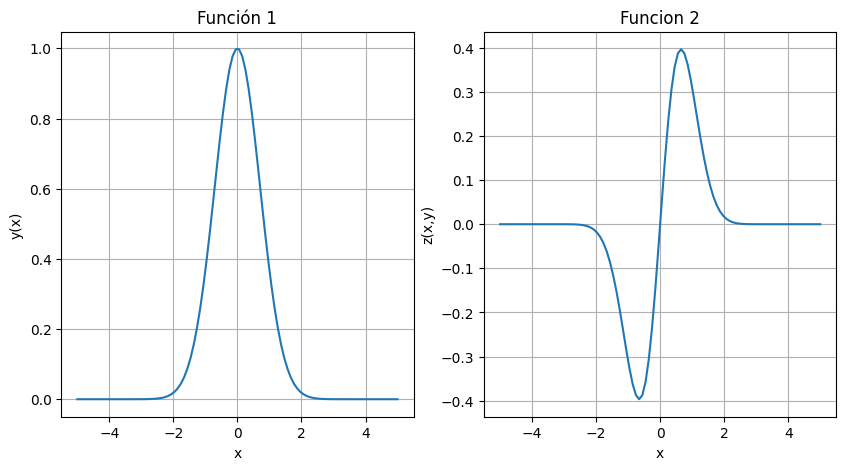

In [3]:
# 2. Define en python vectores y funciones

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
y = np.exp(-x**2)
z = y*np.sin(x)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Función 1")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,z)
plt.xlabel("x")
plt.ylabel("z(x,y)")
plt.title("Funcion 2")
plt.grid()

plt.show()


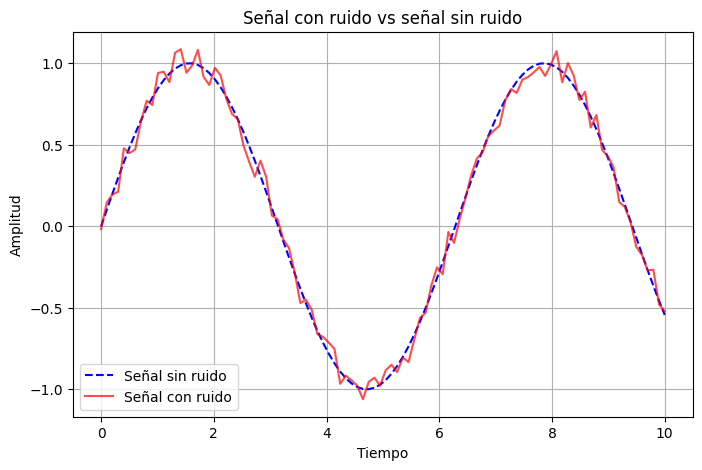

In [17]:
# 3.1 Ruido

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
ruido = np.random.uniform(-0.1, 0.1, 100)

funcion_normal = np.sin(x)
funcion_con_ruido = funcion_normal + ruido

# Graficamos ambas señales
plt.figure(figsize=(8,5))
plt.plot(x, funcion_normal, label="Señal sin ruido", linestyle="dashed", color="blue")
plt.plot(x, funcion_con_ruido, label="Señal con ruido", color="red", alpha=0.7)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal con ruido vs señal sin ruido")
plt.legend()
plt.grid()
plt.show()

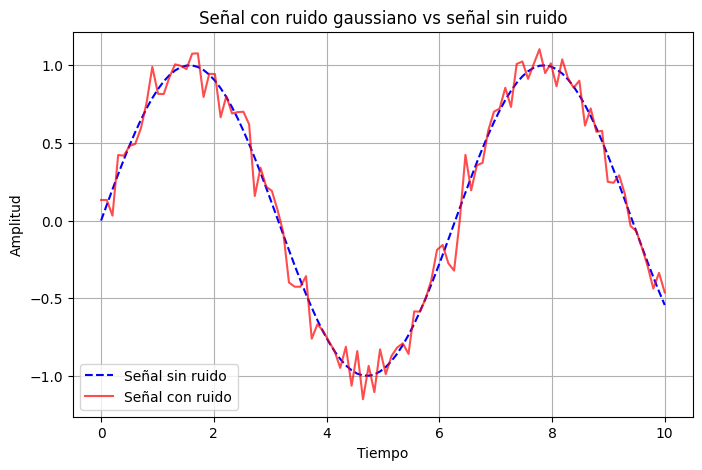

In [20]:
# 3.1 Ruido Gaussiano

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
ruido = np.random.normal(0, 0.1, size=x.shape)

funcion_normal = np.sin(x)
funcion_con_ruido = funcion_normal + ruido

# Graficamos ambas señales
plt.figure(figsize=(8,5))
plt.plot(x, funcion_normal, label="Señal sin ruido", linestyle="dashed", color="blue")
plt.plot(x, funcion_con_ruido, label="Señal con ruido", color="red", alpha=0.7)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal con ruido gaussiano vs señal sin ruido")
plt.legend()
plt.grid()
plt.show()

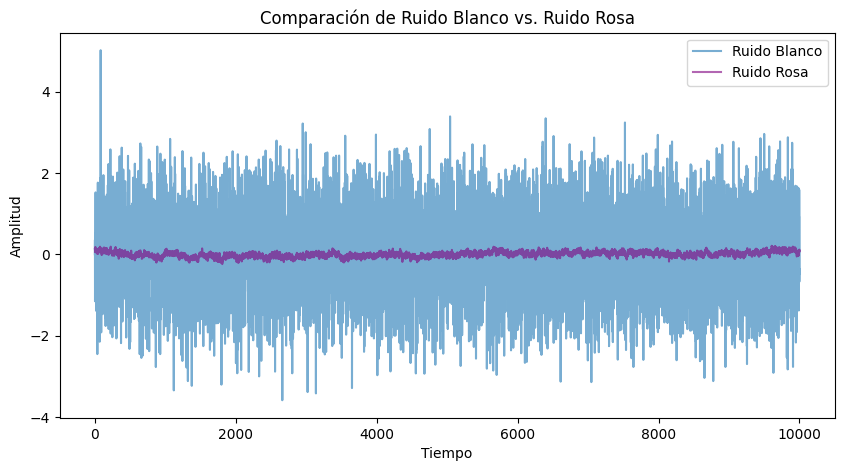

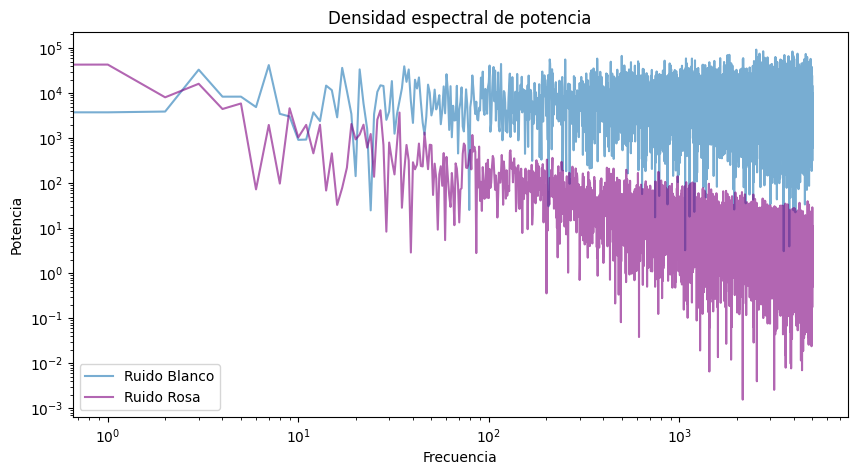

In [24]:
# 3.2 Ruido Rosa

import numpy as np
import matplotlib.pyplot as plt

N = 10000  # Número de muestras

# Generar Ruido Blanco Gaussiano
ruido_blanco = np.random.normal(0, 1, N)

# Generar Ruido Rosa (filtro 1/f en frecuencia)
def generar_ruido_rosa(N):
    f = np.fft.rfftfreq(N)  # Frecuencias positivas
    f[0] = 1  # Evitar división por cero
    espectro = np.random.randn(len(f)) + 1j * np.random.randn(len(f))  # Ruido aleatorio
    espectro /= np.sqrt(f)  # Aplicar la pendiente 1/f
    return np.fft.irfft(espectro, n=N)  # Transformada inversa

ruido_rosa = generar_ruido_rosa(N)

# Graficar ambas señales
plt.figure(figsize=(10, 5))
plt.plot(ruido_blanco, label="Ruido Blanco", alpha=0.6)
plt.plot(ruido_rosa, label="Ruido Rosa", alpha=0.6, color='purple')
plt.legend()
plt.title("Comparación de Ruido Blanco vs. Ruido Rosa")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()

# Graficar densidad espectral de potencia de ambas señales
plt.figure(figsize=(10, 5))
plt.loglog(np.abs(np.fft.rfft(ruido_blanco))**2, label="Ruido Blanco", alpha=0.6)
plt.loglog(np.abs(np.fft.rfft(ruido_rosa))**2, label="Ruido Rosa", alpha=0.6, color='purple')
plt.legend()
plt.title("Densidad espectral de potencia")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia")
plt.show()
